In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
h_data = pd.read_csv('heart_data.csv')

In [3]:
h_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#     age: The person's age in years

#     sex: The person's sex (1 = male, 0 = female)

#     cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

#     trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

#     chol: The person's cholesterol measurement in mg/dl

#     fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

#     restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

#     thalach: The person's maximum heart rate achieved

#     exang: Exercise induced angina (1 = yes; 0 = no)

#     oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot.)

#     slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

#     ca: The number of major vessels (0-3)

#     thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

#     target: Heart disease (0 = no, 1 = yes)

In [7]:
# Renaming
h_data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels', 'thalassemia', 'target']

In [13]:
h_data['sex'][h_data['sex'] == 0] = 'female'
h_data['sex'][h_data['sex'] == 1] = 'male'

h_data['chest_pain_type'][h_data['chest_pain_type'] == 1] = 'typical angina'
h_data['chest_pain_type'][h_data['chest_pain_type'] == 2] = 'atypical angina'
h_data['chest_pain_type'][h_data['chest_pain_type'] == 3] = 'non-anginal pain'
h_data['chest_pain_type'][h_data['chest_pain_type'] == 4] = 'asymptomatic'

h_data['fasting_blood_sugar'][h_data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
h_data['fasting_blood_sugar'][h_data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

h_data['rest_ecg'][h_data['rest_ecg'] == 0] = 'normal'
h_data['rest_ecg'][h_data['rest_ecg'] == 1] = 'ST-T wave abnormality'
h_data['rest_ecg'][h_data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

h_data['exercise_induced_angina'][h_data['exercise_induced_angina'] == 0] = 'no'
h_data['exercise_induced_angina'][h_data['exercise_induced_angina'] == 1] = 'yes'

h_data['st_slope'][h_data['st_slope'] == 1] = 'upsloping'
h_data['st_slope'][h_data['st_slope'] == 2] = 'flat'
h_data['st_slope'][h_data['st_slope'] == 3] = 'downsloping'

h_data['thalassemia'][h_data['thalassemia'] == 1] = 'normal'
h_data['thalassemia'][h_data['thalassemia'] == 2] = 'fixed defect'
h_data['thalassemia'][h_data['thalassemia'] == 3] = 'reversable defect'

<ipython-input-13-d4c192c10908>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_data['sex'][h_data['sex'] == 0] = 'female'
<ipython-input-13-d4c192c10908>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_data['sex'][h_data['sex'] == 1] = 'male'
<ipython-input-13-d4c192c10908>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_data['chest_pain_type'][h_data['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-13-d4c192c10908>

In [14]:
h_data

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,normal,150,no,2.3,0,0,normal,1
1,37,male,atypical angina,130,250,lower than 120mg/ml,ST-T wave abnormality,187,no,3.5,0,0,fixed defect,1
2,41,female,typical angina,130,204,lower than 120mg/ml,normal,172,no,1.4,flat,0,fixed defect,1
3,56,male,typical angina,120,236,lower than 120mg/ml,ST-T wave abnormality,178,no,0.8,flat,0,fixed defect,1
4,57,female,0,120,354,lower than 120mg/ml,ST-T wave abnormality,163,yes,0.6,flat,0,fixed defect,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,female,0,140,241,lower than 120mg/ml,ST-T wave abnormality,123,yes,0.2,upsloping,0,reversable defect,0
299,45,male,non-anginal pain,110,264,lower than 120mg/ml,ST-T wave abnormality,132,no,1.2,upsloping,0,reversable defect,0
300,68,male,0,144,193,greater than 120mg/ml,ST-T wave abnormality,141,no,3.4,upsloping,2,reversable defect,0
301,57,male,0,130,131,lower than 120mg/ml,ST-T wave abnormality,115,yes,1.2,upsloping,1,reversable defect,0


In [16]:
print('Rows     :',h_data.shape[0])
print('Columns  :',h_data.shape[1])
print('\nFeatures :\n     :',h_data.columns.tolist())
print('\nMissing values    :',h_data.isnull().values.sum())
print('\nUnique values :  \n',h_data.nunique())

Rows     : 303
Columns  : 14

Features :
     : ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels', 'thalassemia', 'target']

Missing values    : 0

Unique values :  
 age                         41
sex                          2
chest_pain_type              4
resting_blood_pressure      49
cholesterol                152
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate_achieved     91
exercise_induced_angina      2
st_depression               40
st_slope                     3
major_vessels                5
thalassemia                  4
target                       2
dtype: int64


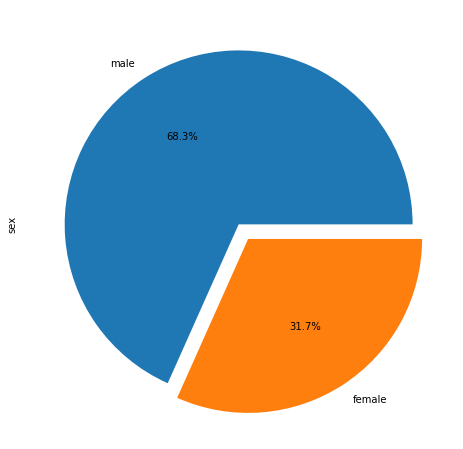

In [52]:
ax=plt.subplots(figsize=(18,8))
h_data['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',)


In [55]:
# As we can see that the number of men are more in the given data set.

In [56]:
h_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
resting_blood_pressure,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholesterol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
max_heart_rate_achieved,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
st_depression,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
major_vessels,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0


In [57]:
#  From the above we can conclude that the Mean age of patients in the datset is 54.3 years

#  Number of men are more in the Dataset i.e 68%

#  Mean Resting Blood Pressure value is 132 mm of Hg with a min of 94mm and maximum of 200mm

#  Mean Cholesterol level is 246 mg/dl with a mainimum value of 126 mg/dl and maximum value of 564 mg/dl



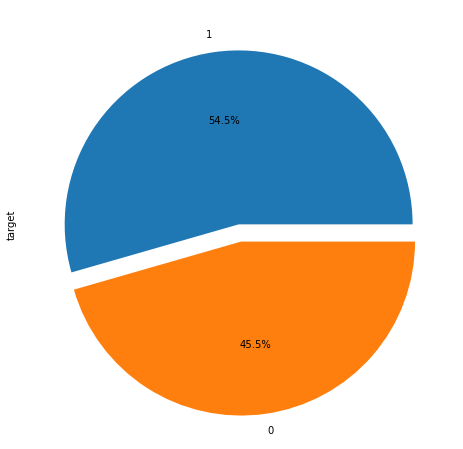

In [58]:
ax=plt.subplots(figsize=(18,8))
h_data['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',)


In [59]:
# There are total 54% heart patients are present in the above given data set.

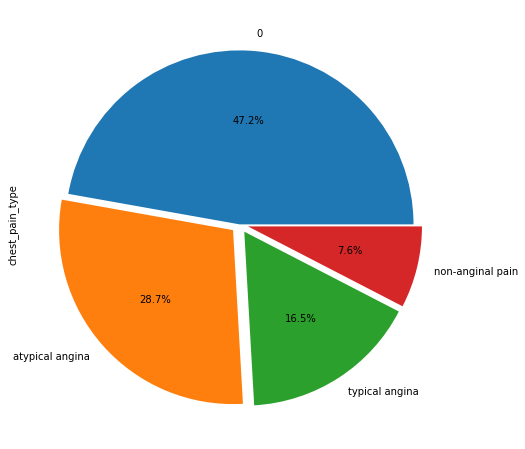

In [61]:
ax=plt.subplots(figsize=(18,8))
h_data['chest_pain_type'].value_counts().plot.pie(explode=[0,0.05,0.05,0.05],autopct='%1.1f%%',)


In [62]:
# Value 0: typical angina

# Value 1: atypical angina

# Value 2: non-anginal pain

# Value 3: asymptomatic

Text(0, 0.5, 'Frequency')

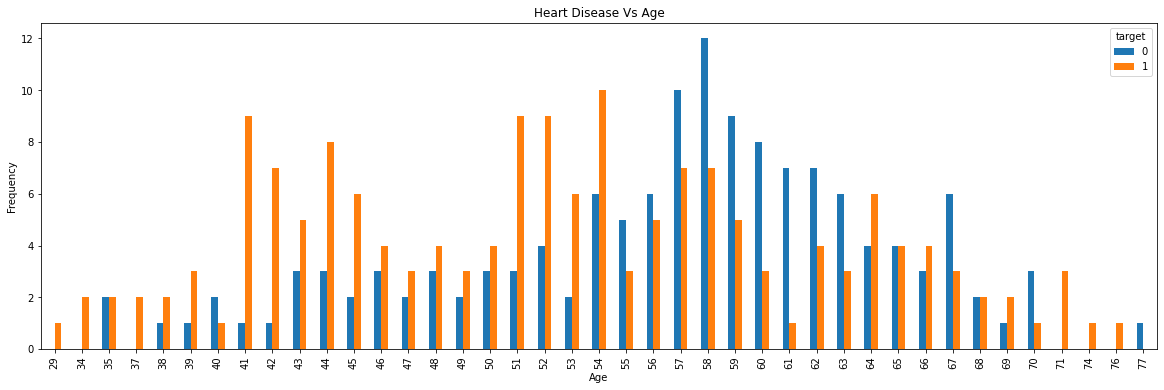

In [63]:
pd.crosstab(h_data.age,h_data.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Vs Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [64]:
# We can clearly see that heart disease strikes more in early 40s and early 50s.

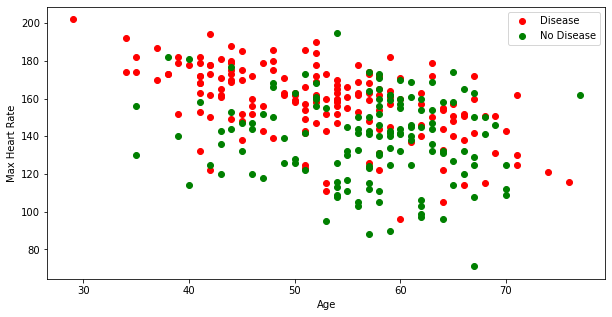

In [73]:
plt.figure(figsize=(10,5))
plt.scatter(x=h_data.age[h_data.target==1],y=h_data.max_heart_rate_achieved[h_data.target==1],c='red')
plt.scatter(x=h_data.age[h_data.target==0],y=h_data.max_heart_rate_achieved[h_data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease','No Disease'])

In [74]:
# Higher heart rate of 30-50 yrs age person have more chances of heart diseases.

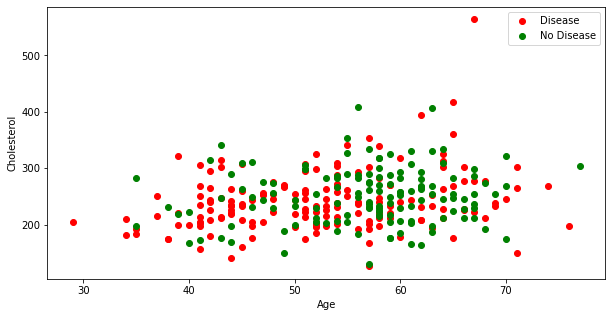

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(x=h_data.age[h_data.target==1],y=h_data.cholesterol[h_data.target==1],c='red')
plt.scatter(x=h_data.age[h_data.target==0],y=h_data.cholesterol[h_data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(['Disease','No Disease'])

In [76]:
# Higher cholesterol is dangerous irrespective of age



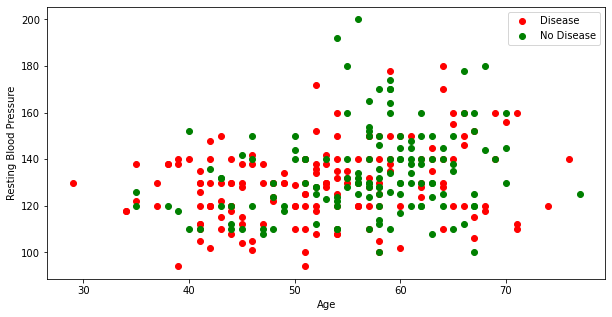

In [79]:
plt.figure(figsize=(10,5))
plt.scatter(x=h_data.age[h_data.target==1],y=h_data.resting_blood_pressure[h_data.target==1],c='red')
plt.scatter(x=h_data.age[h_data.target==0],y=h_data.resting_blood_pressure[h_data.target==0],c='green')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend(['Disease','No Disease'])

In [85]:
# Resting Blood Pressure doesn't have a clear correlation to Heart Disease

In [87]:
h_data.shape

(303, 14)

In [81]:
dm = pd.get_dummies(h_data, drop_first=True)

In [90]:
dm

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1


In [84]:
dm.shape

(303, 20)

In [91]:
# Machine learning model

In [141]:
d = ['target','age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','major_vessels','sex_male',
     'chest_pain_type_atypical angina','chest_pain_type_non-anginal pain','chest_pain_type_typical angina',
     'fasting_blood_sugar_lower than 120mg/ml','rest_ecg_left ventricular hypertrophy','rest_ecg_normal',
     'exercise_induced_angina_yes','st_slope_flat','st_slope_upsloping','thalassemia_fixed defect',
     'thalassemia_normal','thalassemia_reversable defect',]
h_data_new = dm[d]
h_data_new

,target,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,1,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,1,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,1,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,1,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,57,140,241,123,0.2,0,0,0,0,0,1,0,0,1,0,1,0,0,1
299,0,45,110,264,132,1.2,0,1,0,1,0,1,0,0,0,0,1,0,0,1
300,0,68,144,193,141,3.4,2,1,0,0,0,0,0,0,0,0,1,0,0,1
301,0,57,130,131,115,1.2,1,1,0,0,0,1,0,0,1,0,1,0,0,1


In [172]:
from sklearn.model_selection import train_test_split #for data splitting

In [173]:
X_train, X_test, y_train, y_test = train_test_split(dm.drop('target', 1), dm['target'], test_size = .2, random_state=10) #split the data

In [174]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [175]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [176]:
X_train.shape

(242, 19)

In [177]:
 X_test.shape

(61, 19)

In [178]:
y_train.shape

(242,)

In [179]:
y_test.shape

(61,)

In [180]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [181]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 40, n_jobs= 2, random_state = 0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40, n_jobs=2, random_state=0)

In [182]:
 y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [183]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
277    0
121    1
187    0
301    0
283    0
Name: target, Length: 61, dtype: int64

In [184]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [185]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [186]:
cm = confusion_matrix(y_test, y_pred)

In [187]:
cm

array([[28,  7],
       [ 5, 21]], dtype=int64)

In [188]:
metrics.accuracy_score(y_test, y_pred)

0.8032786885245902

In [191]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

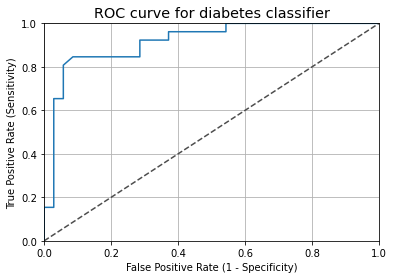

In [192]:
from sklearn.metrics import roc_curve, auc #for model evaluation

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [193]:
auc(fpr, tpr)

0.917032967032967

In [194]:
# so this is all about analysis and model.